### `Graphs of Theia showing last 10 hours before ccsn`
*This notebook contains the following graphs of Theia showing the last 10 hours before supernova collapse:*

Graph #1: Number of IBD interactions Theia over the last 10 hours before ccsn (Note: this is Figure 1 from the Super-K paper DOI 10.3847/1538-4357/ac7f9c but for detector Theia)

----

### Graph #1: Number of IBD interactions per MeV for Theia in the last 10 hours before collapse.

In [6]:
from astropy import units as u
import matplotlib.pyplot as plt
import numpy as np

from snewpy import snowglobes

SNOwGLoBES_path = '/Users/peterasljung/Desktop/snowglobes/' # to use custom SNOwGLoBES detector/channel/smearing files, set SNOwGLoBES directory
SNEWPY_models_base = "../../models/"   # directory containing SNEWPY models

In [7]:
# set distance in kpc
distance = 0.15

# set SNOwGLoBES detector to use
detector = "theia"

# set SNEWPY model type and filename
modeltype_O = 'Odrzywolek_2010'
modeltype_P = 'Patton_2017'

# set desired flavor transformation
transformation = 'NoTransformation'
transformation_INV = 'NoTransformation'

# 10 hours before collapse
tstart = -36000 * u.s
tend = 0 * u.s

In [8]:
#Odrzywolek 15 solar masses
model = 's15_nuebar_data'
modelfile = SNEWPY_models_base + "presn-models/" + modeltype_O + "/" + model + '.txt'

#Normal mass
outfile_O = modeltype_O+"_"+model+"_"+transformation

#Inverted mass
outfile_O_INV = modeltype_O +"_"+model+"_"+transformation_INV

In [9]:
#Patton 15 solar masses 
model_P = 'totalLuminosity_15SolarMass'
modelfile_P = SNEWPY_models_base + "presn-models/" + modeltype_P + "/" + model_P + '.dat'

#Normal mass
outfile_P = modeltype_P +"_"+model_P+"_"+transformation

#Inverted mass
outfile_P_INV = modeltype_P +"_"+model_P+"_"+transformation_INV

In [10]:
#Generate Patton normal
print("Preparing fluences ...")
tarredfile_P = snowglobes.generate_fluence(modelfile_P, modeltype_P, transformation, distance, outfile_P, tstart, tend)

# Next, we run SNOwGLoBES. This will loop over all the fluence files in `tarredfile`.
print("Running SNOwGLoBES ...")
snowglobes.simulate(SNOwGLoBES_path, tarredfile_P, detector_input=detector)

# Finally, we collate SNOwGLoBES’ results into a dictionary
print("Collating results ...")
tables_P = snowglobes.collate(SNOwGLoBES_path, tarredfile_P, skip_plots=True)

Preparing fluences ...
Running SNOwGLoBES ...
Collating results ...


/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:155: UserWarning: Smearing not found for detector=theia, channel=ibd. Using unsmeared spectrum
  warn(f'Smearing not found for detector={detector}, channel={channel.name}. Using unsmeared spectrum')
/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:160: UserWarning: Efficiency not found for detector=theia, channel=ibd. Using 100% efficiency
  warn(f'Efficiency not found for detector={detector}, channel={channel.name}. Using 100% efficiency')


In [11]:
#Generate Patton inverted
print("Preparing fluences ...")
tarredfile_P_INV = snowglobes.generate_fluence(modelfile_P, modeltype_P, transformation_INV, distance, outfile_P_INV, tstart, tend)

# Next, we run SNOwGLoBES. This will loop over all the fluence files in `tarredfile`.
print("Running SNOwGLoBES ...")
snowglobes.simulate(SNOwGLoBES_path, tarredfile_P_INV, detector_input=detector)

# Finally, we collate SNOwGLoBES’ results into a dictionary
print("Collating results ...")
tables_P_INV = snowglobes.collate(SNOwGLoBES_path, tarredfile_P_INV, skip_plots=True)

Preparing fluences ...
Running SNOwGLoBES ...


/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:155: UserWarning: Smearing not found for detector=theia, channel=ibd. Using unsmeared spectrum
  warn(f'Smearing not found for detector={detector}, channel={channel.name}. Using unsmeared spectrum')
/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:160: UserWarning: Efficiency not found for detector=theia, channel=ibd. Using 100% efficiency
  warn(f'Efficiency not found for detector={detector}, channel={channel.name}. Using 100% efficiency')


Collating results ...


In [12]:
#Generate Odrzywolek normal
print("Preparing fluences ...")
tarredfile = snowglobes.generate_fluence(modelfile, modeltype_O, transformation, distance, outfile_O, tstart, tend)

# Next, we run SNOwGLoBES. This will loop over all the fluence files in `tarredfile`.
print("Running SNOwGLoBES ...")
snowglobes.simulate(SNOwGLoBES_path, tarredfile, detector_input=detector)

# Finally, we collate SNOwGLoBES’ results into a dictionary
print("Collating results ...")
tables = snowglobes.collate(SNOwGLoBES_path, tarredfile, skip_plots=True)

Preparing fluences ...
Running SNOwGLoBES ...
Collating results ...


/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:155: UserWarning: Smearing not found for detector=theia, channel=ibd. Using unsmeared spectrum
  warn(f'Smearing not found for detector={detector}, channel={channel.name}. Using unsmeared spectrum')
/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:160: UserWarning: Efficiency not found for detector=theia, channel=ibd. Using 100% efficiency
  warn(f'Efficiency not found for detector={detector}, channel={channel.name}. Using 100% efficiency')


In [13]:
#Generate Odrzywolek inverted
print("Preparing fluences ...")
tarredfile_INV = snowglobes.generate_fluence(modelfile, modeltype_O, transformation_INV, distance, outfile_O_INV, tstart, tend)

# Next, we run SNOwGLoBES. This will loop over all the fluence files in `tarredfile`.
print("Running SNOwGLoBES ...")
snowglobes.simulate(SNOwGLoBES_path, tarredfile_INV, detector_input=detector)

# Finally, we collate SNOwGLoBES’ results into a dictionary
print("Collating results ...")
tables_INV = snowglobes.collate(SNOwGLoBES_path, tarredfile_INV, skip_plots=True)

Preparing fluences ...
Running SNOwGLoBES ...


/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:155: UserWarning: Smearing not found for detector=theia, channel=ibd. Using unsmeared spectrum
  warn(f'Smearing not found for detector={detector}, channel={channel.name}. Using unsmeared spectrum')
/Users/peterasljung/miniconda3/envs/josef/lib/python3.11/site-packages/snewpy/rate_calculator.py:160: UserWarning: Efficiency not found for detector=theia, channel=ibd. Using 100% efficiency
  warn(f'Efficiency not found for detector={detector}, channel={channel.name}. Using 100% efficiency')


Collating results ...


In [14]:
#Find keys
print(list(tables.keys()))

['theia', 'Collated_Odrzywolek_2010_s15_nuebar_data_NoTransformation_theia_events_smeared_weighted.dat', 'Collated_Odrzywolek_2010_s15_nuebar_data_NoTransformation_theia_events_unsmeared_weighted.dat']


In [15]:
#Assign keys for each model and for normal/inverted masses
key_O = 'Collated_Odrzywolek_2010_s15_nuebar_data_NoTransformation_theia_events_unsmeared_weighted.dat'
key_O_INV = 'Collated_Odrzywolek_2010_s15_nuebar_data_NoTransformation_theia_events_unsmeared_weighted.dat'
key_P = 'Collated_Patton_2017_totalLuminosity_15SolarMass_NoTransformation_theia_events_unsmeared_weighted.dat'
key_P_INV = 'Collated_Patton_2017_totalLuminosity_15SolarMass_NoTransformation_theia_events_unsmeared_weighted.dat'

In [16]:

print(f"Energy bins (in MeV):\n{tables[key_O]['data'][0][:12]}")

for i, channel in enumerate(tables[key_O]['header'].split()[1:]):

    print(f"Number of {channel} events in those energy bins:\n{tables[key_O]['data'][i+1][:12]}")

Energy bins (in MeV):
[0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6. ]
Number of ibd events in those energy bins:
[   0.            0.            0.          678.08681823 1315.60948889
 1285.88207625  932.23415785  572.26142388  317.64871623  163.97370188
   80.41978543   38.49919584]
Number of nc events in those energy bins:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Number of e events in those energy bins:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Text(0, 0.5, 'Number of IBD events per MeV in Theia')

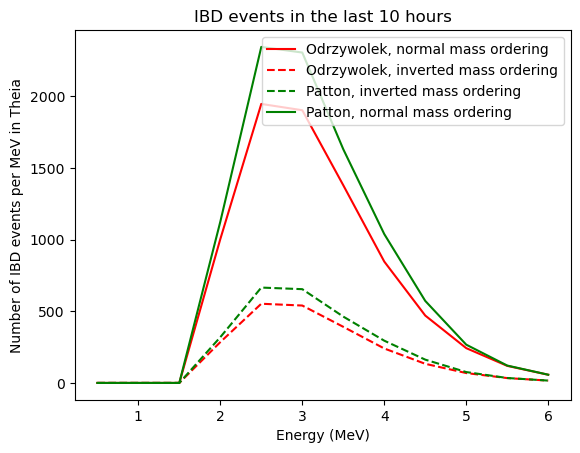

In [17]:
#ODRZYWOLEK NORMAL
table_O = tables[key_O]['data']

energy_bins_O = table_O[0][:12] 
ibd_channel_idx = None
for idx, channel in enumerate(tables[key_O]['header'].split()[1:]):
    if channel == 'ibd':
        ibd_channel_idx = idx + 1
        break

events_ibd_O = table_O[ibd_channel_idx][:12]
events_SK_O = np.array(events_ibd_O) * 2 * 0.74 
# *2 because we're using 0.5MeV bins rather than 1 MeV
# * 0.74 74% survival rate for normal mass hierachy
# * 0.21 21% survavel rate for inverted mass hierachy

#ODRZYWOLEK INVERTED
table_O_INV = tables_INV[key_O_INV]['data']

energy_bins_O_INV = table_O_INV[0][:12] 
ibd_channel_idx_INV = None
for idx, channel in enumerate(tables_INV[key_O_INV]['header'].split()[1:]):
    if channel == 'ibd':
        ibd_channel_idx_INV = idx + 1
        break

events_ibd_O_INV = table_O_INV[ibd_channel_idx_INV][:12]
events_SK_O_INV = np.array(events_ibd_O_INV) * 2 * 0.21

#PATTON INVERTED
table_P_INV = tables_P_INV[key_P_INV]['data']

energy_bins_INV = table_P_INV[0][:12] 
ibd_channel_idx_P_INV = None
for idx, channel in enumerate(tables_P_INV[key_P_INV]['header'].split()[1:]):
    if channel == 'ibd':
        ibd_channel_idx_P_INV = idx + 1
        break

events_ibd_P_INV = table_P_INV[ibd_channel_idx_P_INV][:12]
events_SK_P_INV = np.array(events_ibd_P_INV) * 2 * 0.21

#PATTON NORMAL
table_P = tables_P[key_P]['data']

energy_bins_P = table_P[0][:12] 
ibd_channel_idx_P = None
for idx, channel in enumerate(tables_P[key_P]['header'].split()[1:]):
    if channel == 'ibd':
        ibd_channel_idx_P = idx + 1
        break

events_ibd_P = table_P[ibd_channel_idx_P][:12]
events_SK_P = np.array(events_ibd_P) * 2 * 0.74


#Plot
plt.title('IBD events in the last 10 hours')
plt.plot(energy_bins_O, events_SK_O, color='red', label = 'Odrzywolek, normal mass ordering')
plt.plot(energy_bins_O, events_SK_O_INV, color='red', linestyle='dashed',label = 'Odrzywolek, inverted mass ordering')
plt.plot(energy_bins_O, events_SK_P_INV, color='green', linestyle='dashed',label = 'Patton, inverted mass ordering')
plt.plot(energy_bins_O, events_SK_P, color='green',label = 'Patton, normal mass ordering')
plt.legend()
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of IBD events per MeV in Theia')